In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [10]:
df = pd.read_csv('preprocessed_data.csv')

In [11]:
numerical_columns = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
                    'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
                    'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'GENDER', 'WORK_LIFE_BALANCE_SCORE',
                    'AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 'AGE_Less than 20']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Code 1

In [12]:
# fit the linear regression model
model = smf.ols(formula='DAILY_STRESS ~ TIME_FOR_PASSION + WEEKLY_MEDITATION', data=data).fit()

# print the model summary
print(model.summary())

# fit the linear regression model
model = smf.ols(formula='DAILY_SHOUTING ~ TIME_FOR_PASSION + WEEKLY_MEDITATION', data=data).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           DAILY_STRESS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     526.1
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          5.17e-222
Time:                        12:51:26   Log-Likelihood:                -22154.
No. Observations:               15972   AIC:                         4.431e+04
Df Residuals:                   15969   BIC:                         4.434e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.691e-16      0.00

### Code 2

Correlation between time spent on personal passions and daily stress: -0.1581261478292091
Correlation between time spent meditating and daily stress: -0.2186462626789499
Correlation between time spent on personal passions and daily shouting: -0.09445898961429894
Correlation between time spent meditating and daily shouting: -0.0978407796837553


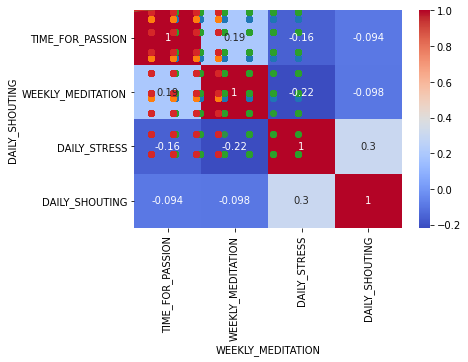

In [13]:
# Compute correlation matrix
corr_matrix = df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'DAILY_STRESS', 'DAILY_SHOUTING']].corr()

# Plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Plot time spent on personal passions vs daily stress
sns.regplot(x='TIME_FOR_PASSION', y='DAILY_STRESS', data=df)

# Plot time spent meditating vs daily stress
sns.regplot(x='WEEKLY_MEDITATION', y='DAILY_STRESS', data=df)

# Plot time spent on personal passions vs daily shouting
sns.regplot(x='TIME_FOR_PASSION', y='DAILY_SHOUTING', data=df)

# Plot time spent meditating vs daily shouting
sns.regplot(x='WEEKLY_MEDITATION', y='DAILY_SHOUTING', data=df)

# Print correlation coefficients
print('Correlation between time spent on personal passions and daily stress:', df['TIME_FOR_PASSION'].corr(df['DAILY_STRESS']))
print('Correlation between time spent meditating and daily stress:', df['WEEKLY_MEDITATION'].corr(df['DAILY_STRESS']))
print('Correlation between time spent on personal passions and daily shouting:', df['TIME_FOR_PASSION'].corr(df['DAILY_SHOUTING']))
print('Correlation between time spent meditating and daily shouting:', df['WEEKLY_MEDITATION'].corr(df['DAILY_SHOUTING']))

### Code3

In [16]:
# Create new column for total time spent on personal passions and meditation
data['total_time_spent'] = data['TIME_FOR_PASSION'] + data['WEEKLY_MEDITATION']

# Model 1: Impact of total time spent on mental health attributes
X = data[['total_time_spent']]
y1 = data['DAILY_STRESS']
y2 = data['DAILY_SHOUTING']

model1 = sm.OLS(y1, sm.add_constant(X)).fit()
model2 = sm.OLS(y2, sm.add_constant(X)).fit()

print('Model 1: Impact of Total Time Spent on Daily Stress')
print(model1.summary())

print('Model 2: Impact of Total Time Spent on Daily Shouting')
print(model2.summary())

Model 1: Impact of Total Time Spent on Daily Stress
                            OLS Regression Results                            
Dep. Variable:           DAILY_STRESS   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1011.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          3.00e-215
Time:                        12:53:52   Log-Likelihood:                -22173.
No. Observations:               15972   AIC:                         4.435e+04
Df Residuals:                   15970   BIC:                         4.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [17]:
# Model 2: Impact of time spent on personal passions and meditation separately on mental health attributes
X = data[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION']]
y1 = data['DAILY_STRESS']
y2 = data['DAILY_SHOUTING']

model3 = sm.OLS(y1, sm.add_constant(X)).fit()
model4 = sm.OLS(y2, sm.add_constant(X)).fit()

print('Model 3: Impact of Time Spent on Personal Passions and Meditation on Daily Stress')
print(model3.summary())

print('Model 4: Impact of Time Spent on Personal Passions and Meditation on Daily Shouting')
print(model4.summary())

Model 3: Impact of Time Spent on Personal Passions and Meditation on Daily Stress
                            OLS Regression Results                            
Dep. Variable:           DAILY_STRESS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     526.1
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          5.17e-222
Time:                        12:53:57   Log-Likelihood:                -22154.
No. Observations:               15972   AIC:                         4.431e+04
Df Residuals:                   15969   BIC:                         4.434e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

DAILY_STRESS              -0.365398
DAILY_SHOUTING            -0.273153
LOST_VACATION             -0.266243
BMI_RANGE                 -0.251988
AGE_21 to 35              -0.099242
AGE_Less than 20          -0.021036
AGE_36 to 50               0.007121
GENDER                     0.039881
AGE_51 or more             0.126378
SLEEP_HOURS                0.196395
SUFFICIENT_INCOME          0.403561
SOCIAL_NETWORK             0.412586
WEEKLY_MEDITATION          0.416171
DAILY_STEPS                0.422981
FRUITS_VEGGIES             0.452255
DONATION                   0.458829
LIVE_VISION                0.471311
FLOW                       0.478199
PERSONAL_AWARDS            0.504224
CORE_CIRCLE                0.507541
TIME_FOR_PASSION           0.516967
PLACES_VISITED             0.529615
TODO_COMPLETED             0.545503
SUPPORTING_OTHERS          0.548851
ACHIEVEMENT                0.561244
WORK_LIFE_BALANCE_SCORE    1.000000
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64


ValueError: No axis named AGE_36 to 50 for object type DataFrame

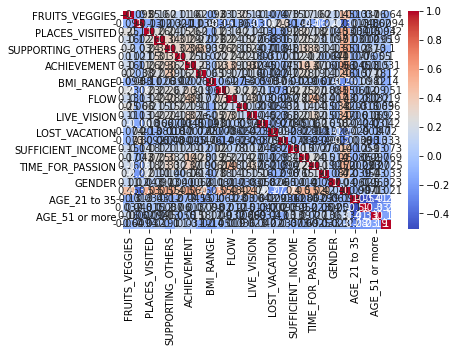

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('preprocessed_data.csv')

# Analyze the correlation between attributes and work-life balance score
corr = df.corr()['WORK_LIFE_BALANCE_SCORE'].sort_values()
print(corr)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Group the data by demographic factors
grouped_age = df.groupby('AGE_21 to 35','AGE_36 to 50','AGE_51 or more','AGE_Less than 20')
grouped_gender = df.groupby('GENDER')

# Perform t-test to determine significant differences in attributes and work-life balance score across age and gender groups
from scipy.stats import ttest_ind

for age, group in grouped_age:
    group1 = group[group['TIME_FOR_PASSION'] > 0]
    group2 = group[group['TIME_FOR_PASSION'] == 0]
    p_val = ttest_ind(group1['WORK_LIFE_BALANCE_SCORE'], group2['WORK_LIFE_BALANCE_SCORE'])[1]
    print(f"P-value for age {age}: {p_val}")

for gender, group in grouped_gender:
    group1 = group[group['WEEKLY_MEDITATION'] > 0]
    group2 = group[group['WEEKLY_MEDITATION'] == 0]
    p_val = ttest_ind(group1['WORK_LIFE_BALANCE_SCORE'], group2['WORK_LIFE_BALANCE_SCORE'])[1]
    print(f"P-value for gender {gender}: {p_val}")

# Apply K-means clustering algorithm to identify groups with similar lifestyle and wellbeing profiles
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
X = df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'DAILY_STRESS', 'DAILY_SHOUTING']]
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Visualize the distribution of attributes within each cluster
sns.pairplot(df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'DAILY_STRESS', 'DAILY_SHOUTING', 'Cluster']], hue='Cluster')

# Develop a predictive model using linear regression
X = df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'SUPPORTING_OTHERS', 'CORE_CIRCLE']]
y = df['WORK_LIFE_BALANCE_SCORE']

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Calculate the R-squared score to evaluate model performance
from sklearn.metrics import r2_score

print(f"R-squared score: {r2_score(y, y_pred)}")

# Analyze the impact of habits on mental health-related attributes
X = df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION']]
y = df[['DAILY_STRESS', 'DAILY_SHOUTING']]

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Visualize the relationship between habits and mental health-related attributes
sns.pairplot(df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'DAILY_STRESS', 'DAILY_SHOUTING']])

# Print the coefficients of the linear regression model
print(lin_reg.coef_)

In [3]:
df

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,3,2.0,2,5,0,5,2,0,1,6,...,1,4,0,5,1,609.5,0,1,0,0
1,2,3.0,4,3,8,10,5,2,2,5,...,2,3,2,6,1,655.6,0,1,0,0
2,2,3.0,3,4,4,10,3,2,2,2,...,2,4,8,3,1,631.6,0,1,0,0
3,3,3.0,10,3,10,7,2,5,2,3,...,1,5,2,0,1,622.7,0,0,1,0
4,5,1.0,3,3,10,4,2,4,2,5,...,2,8,1,5,1,663.9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3.0,0,4,0,10,0,4,2,8,...,1,5,2,5,1,644.5,0,0,1,0
15968,3,3.0,6,8,7,4,6,3,1,7,...,2,10,5,8,1,714.9,1,0,0,0
15969,4,3.0,0,10,10,8,6,5,1,7,...,2,10,1,10,0,716.6,1,0,0,0
15970,1,1.0,10,8,2,7,3,2,1,6,...,2,1,6,8,1,682.0,1,0,0,0


R-squared score: 0.5939327935978512
[[-0.06045057 -0.08864683]
 [-0.07705776 -0.07343168]]


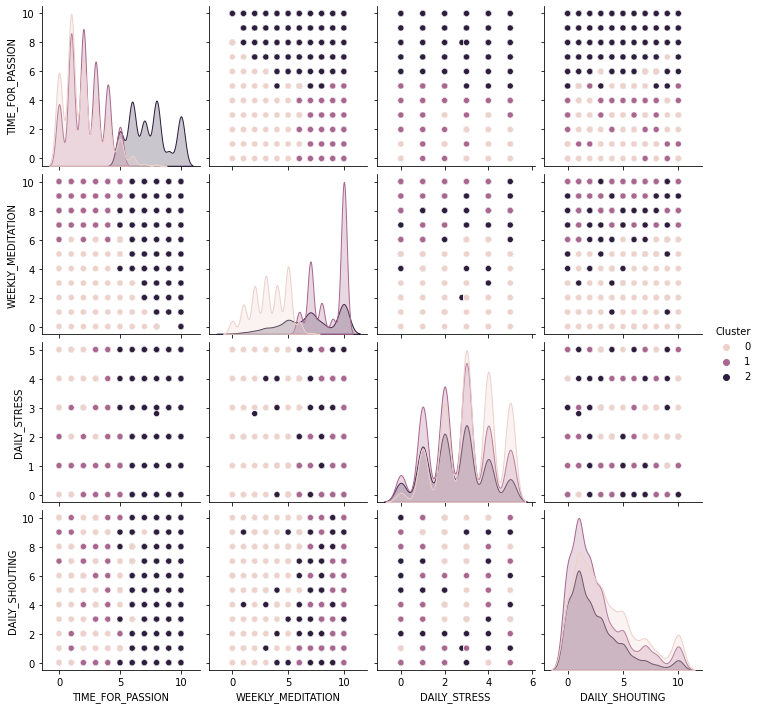

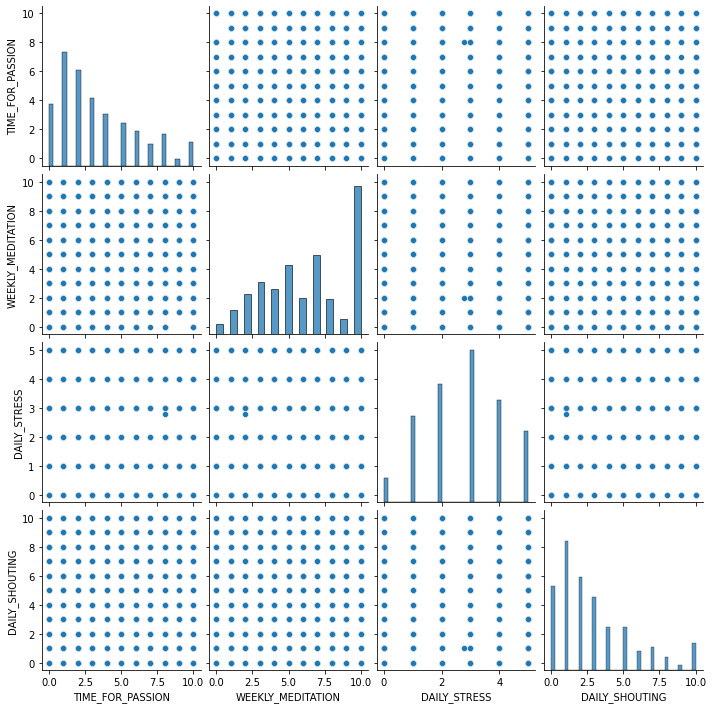

In [4]:
# Apply K-means clustering algorithm to identify groups with similar lifestyle and wellbeing profiles
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
X = df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'DAILY_STRESS', 'DAILY_SHOUTING']]
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Visualize the distribution of attributes within each cluster
sns.pairplot(df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'DAILY_STRESS', 'DAILY_SHOUTING', 'Cluster']], hue='Cluster')

# Develop a predictive model using linear regression
X = df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'SUPPORTING_OTHERS', 'CORE_CIRCLE']]
y = df['WORK_LIFE_BALANCE_SCORE']

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Calculate the R-squared score to evaluate model performance
from sklearn.metrics import r2_score

print(f"R-squared score: {r2_score(y, y_pred)}")

# Analyze the impact of habits on mental health-related attributes
X = df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION']]
y = df[['DAILY_STRESS', 'DAILY_SHOUTING']]

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Visualize the relationship between habits and mental health-related attributes
sns.pairplot(df[['TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'DAILY_STRESS', 'DAILY_SHOUTING']])

# Print the coefficients of the linear regression model
print(lin_reg.coef_)